In [12]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import pylab
import numpy as np
from scipy.stats import linregress
import matplotlib.ticker as ticker

In [2]:
genes = ["ha", "na", "np", "ns", "pa" , "mp" , "pb1" , "pb2"]

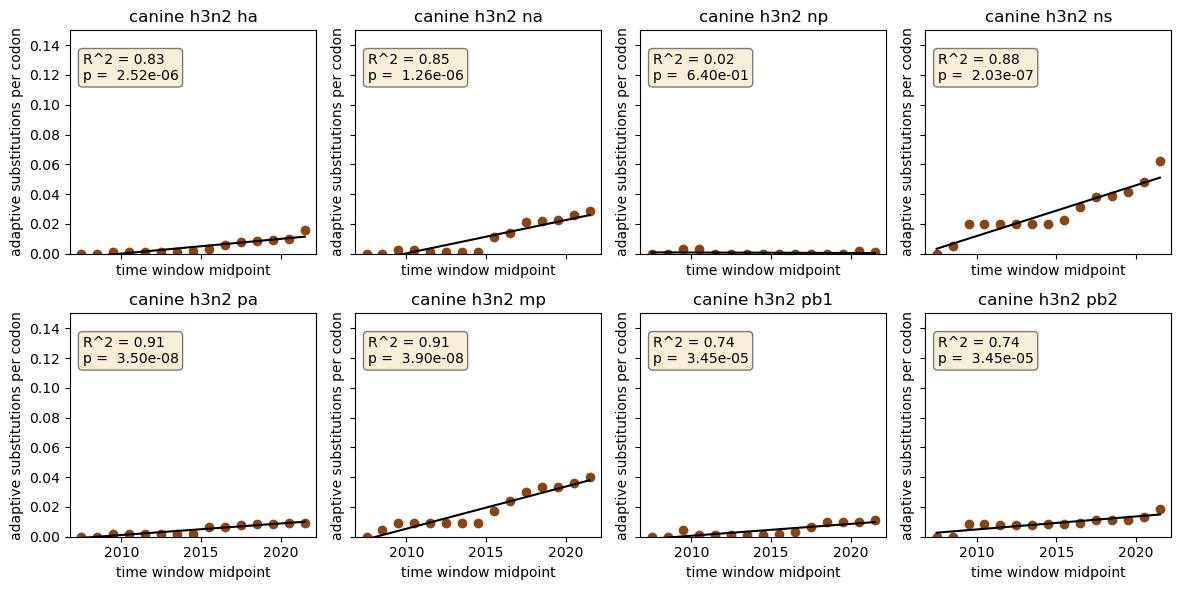

In [10]:
genes = ["ha", "na", "np", "ns", "pa" , "mp" , "pb1" , "pb2"]
num_genes = len(genes)
num_columns = 4
num_rows = (num_genes + num_columns - 1) // num_columns  # Ensure at least num_columns, round up if necessary


fig, axs = plt.subplots(num_rows, num_columns, sharex = True, sharey=True, figsize=(12, 3 * num_rows))

axs = axs.flatten()

for i, gene in enumerate(genes):
    with open(f"./h3nx_{gene}_3_3_adaptation_bootstrapped.json", "r") as file:
        jsonData = json.load(file)

    x = jsonData['window_midpoint']
    y = jsonData['adaptive_substitutions_per_codon']

    axs[i].scatter(x, y, color='saddlebrown')
    
    #linear regression line
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    axs[i].plot(x, slope * np.array(x) + intercept, color='black')
    r_squared = r_value**2

    axs[i].set_title(f"canine h3n2 {gene}")
    
    exponent = int(f'{p_value:.2e}'.split('e')[1])
    text = f'R^2 = {r_squared:.2f}\np = {p_value: .2e}'
    axs[i].text(0.05, 0.9, text, transform=axs[i].transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    axs[i].set_xlabel("time window midpoint")
    axs[i].set_ylabel("adaptive substitutions per codon")
    axs[i].set_ylim(0, 0.15)


plt.tight_layout()

plt.show()


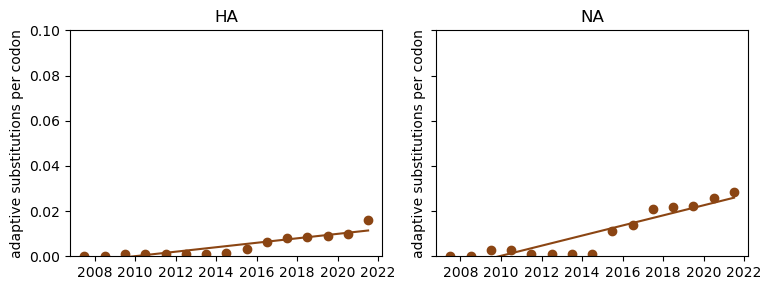

In [17]:
#for iizd

genes = ["HA","NA"]
num_genes = len(genes)
num_columns = 4
num_rows = (num_genes + num_columns - 1) // num_columns  # Ensure at least num_columns, round up if necessary


fig, axs = plt.subplots(num_rows, num_columns, sharex = True, sharey=True, figsize=(15, 3 * num_rows))

axs = axs.flatten()

for i, gene in enumerate(genes):
    with open(f"./h3nx_{gene}_3_3_adaptation_bootstrapped.json", "r") as file:
        jsonData = json.load(file)

    x = jsonData['window_midpoint']
    y = jsonData['adaptive_substitutions_per_codon']

    axs[i].scatter(x, y, color='saddlebrown')
    
    #linear regression line
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    axs[i].plot(x, slope * np.array(x) + intercept, color='saddlebrown')
    r_squared = r_value**2

    axs[i].set_title(f"{gene}")
    
    exponent = int(f'{p_value:.2e}'.split('e')[1])
    # text = f'R^2 = {r_squared:.2f}\np = {p_value: .2e}'
    # axs[i].text(0.05, 0.9, text, transform=axs[i].transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # axs[i].set_xlabel("time window midpoint")
    axs[i].set_ylabel("adaptive substitutions per codon")
    axs[i].set_ylim(0, 0.10)
    axs[i].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

#remove extra subplots if present
for i in range(num_genes, len(axs)):
    fig.delaxes(axs[i])
    

plt.tight_layout()

plt.show()
